# Project: Investigate a Dataset (Market capital addition during pandemic)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#Explanatory data analysis">Explanatory Data Analytics</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# Introduction
In this analysis, I will explore market Capital addition during the pendamicMarket capital addition during pandemic dataset, find relationships among its 7 associated variables (characteristics):
### Variables:
  - S.No: company number
  - Company: company name  
  - Sector: sector or industry
  - Market cap: market capital
  - Market cap added: market capital added during the pendamic
  - Change: change in capital

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [2]:
df = pd.read_csv('companies_market_cap.csv')
print(df.shape)
df.head()

(100, 7)


,S.No,Company,Country,Sector,Market cap ($bn),Market cap added,Change
0,1,Amazon,US,Consumer discretionary,"1,317.30",401.1,43.8
1,2,Microsoft,US,Technology,"1,473.00",269.9,22.4
2,3,Apple,US,Technology,"1,523.90",219.1,16.8
3,4,Tesla,US,Consumer discretionary,183.8,108.4,143.8
4,5,Tencent,China,Communication services,550.9,93.1,20.3


# Data Wrangling

## General properties

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No              100 non-null    int64  
 1   Company           100 non-null    object 
 2   Country           100 non-null    object 
 3   Sector            100 non-null    object 
 4   Market cap ($bn)  100 non-null    object 
 5   Market cap added  100 non-null    float64
 6   Change            100 non-null    float64
dtypes: float64(2), int64(1), object(4)
memory usage: 5.6+ KB


In [4]:
df.duplicated().sum()

0

In [5]:
df.shape

(100, 7)

In [6]:
df.describe()

,S.No,Market cap added,Change
count,100.000000,100.000000,100.000000
mean,50.500000,30.543000,59.395000
std,29.011492,52.844587,61.721631
min,1.000000,8.200000,4.500000
25%,25.750000,10.600000,20.375000
50%,50.500000,14.200000,43.100000
75%,75.250000,27.150000,72.450000
max,100.000000,401.100000,408.700000


In [7]:
df.nunique()

S.No                100
Company             100
Country              19
Sector               10
Market cap ($bn)     95
Market cap added     76
Change               96
dtype: int64

## Data cleaning

In [8]:
df.rename(columns= {'Market cap ($bn)':'market_cap_in_bn'}, inplace= True)

In [9]:
df['market_cap_in_bn'] = df['market_cap_in_bn'].str.replace(',', '')

In [10]:
df['market_cap_in_bn'] = df['market_cap_in_bn'].astype(float)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   S.No              100 non-null    int64  
 1   Company           100 non-null    object 
 2   Country           100 non-null    object 
 3   Sector            100 non-null    object 
 4   market_cap_in_bn  100 non-null    float64
 5   Market cap added  100 non-null    float64
 6   Change            100 non-null    float64
dtypes: float64(3), int64(1), object(3)
memory usage: 5.6+ KB


In [12]:
df['market_cap_in_bn']

0     1317.3
1     1473.0
2     1523.9
3      183.8
4      550.9
       ...  
95      31.5
96      21.5
97      19.9
98      13.4
99      14.3
Name: market_cap_in_bn, Length: 100, dtype: float64

# Exploratory Data Analysis

In [13]:
tick_props = np.arange(0, 50, 5)
tick_names = [v for v in tick_props]

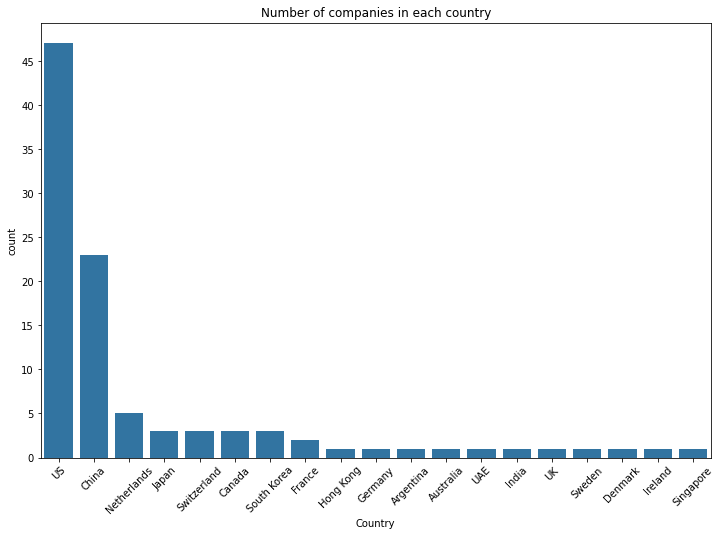

In [14]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
base_order = df['Country'].value_counts().index
sb.countplot(df['Country'], color = base_color, order = base_order)
plt.xticks(rotation = 45)
plt.yticks(ticks = tick_props, labels = tick_names)
plt.title('Number of companies in each country');

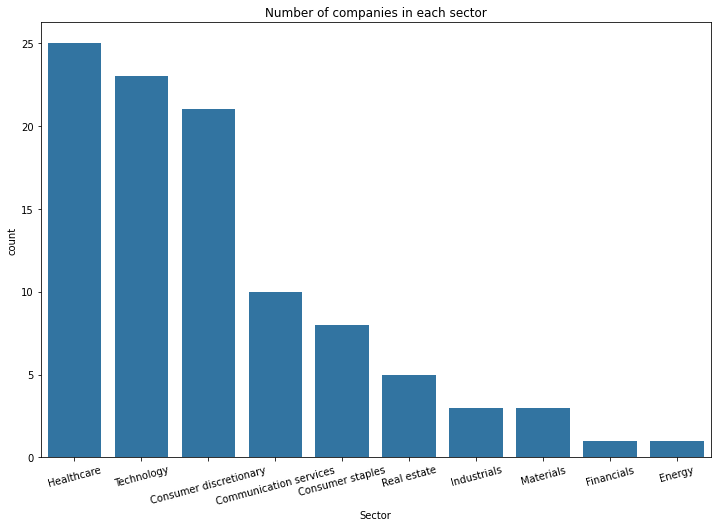

In [15]:
plt.figure(figsize = [12, 8])
base_color = sb.color_palette()[0]
base_order = df['Sector'].value_counts().index
sb.countplot(df['Sector'], color = base_color, order = base_order)
plt.xticks(rotation = 15)
plt.title("Number of companies in each sector");

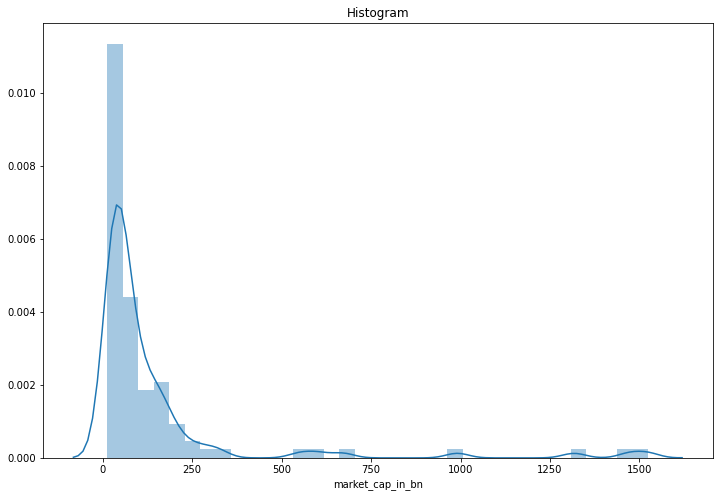

In [16]:
plt.figure(figsize = [12, 8])
sb.distplot(df['market_cap_in_bn'])
plt.title('Histogram');

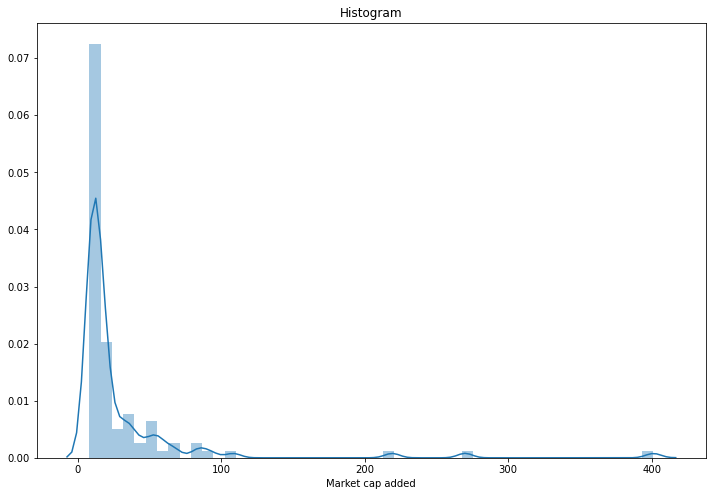

In [17]:
plt.figure(figsize = [12, 8])
sb.distplot(df['Market cap added'])
plt.title('Histogram');

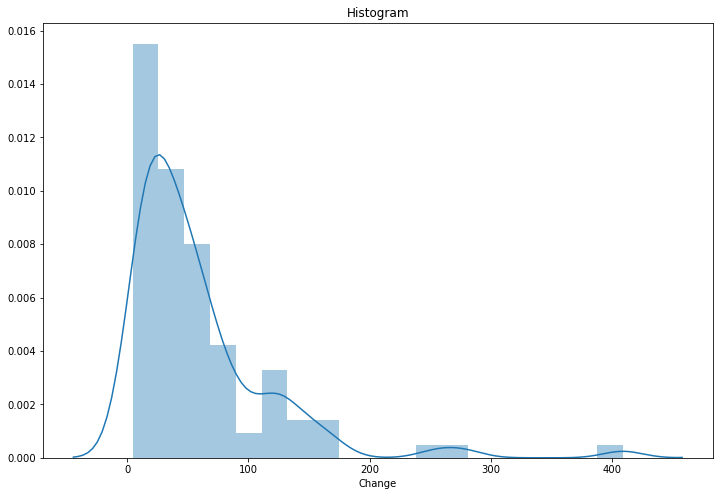

In [18]:
plt.figure(figsize = [12, 8])
sb.distplot(df['Change'])
plt.title('Histogram');

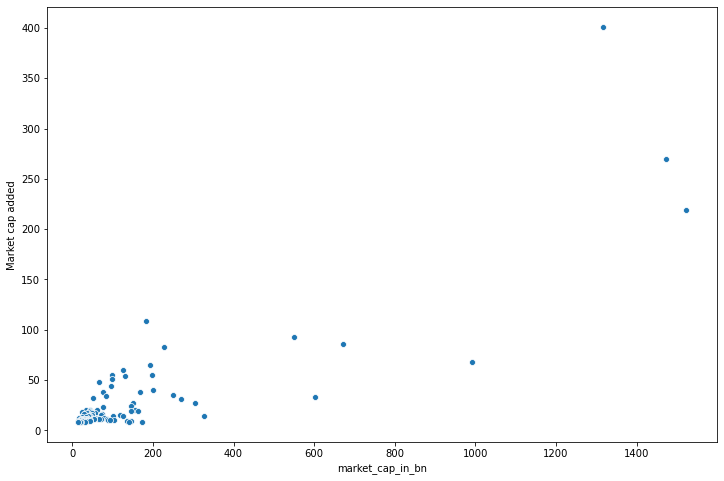

In [21]:
plt.figure(figsize= [12, 8])
sb.scatterplot(data = df, x = 'market_cap_in_bn', y = 'Market cap added');

It seems that there is correlation between Market capital and added market capital

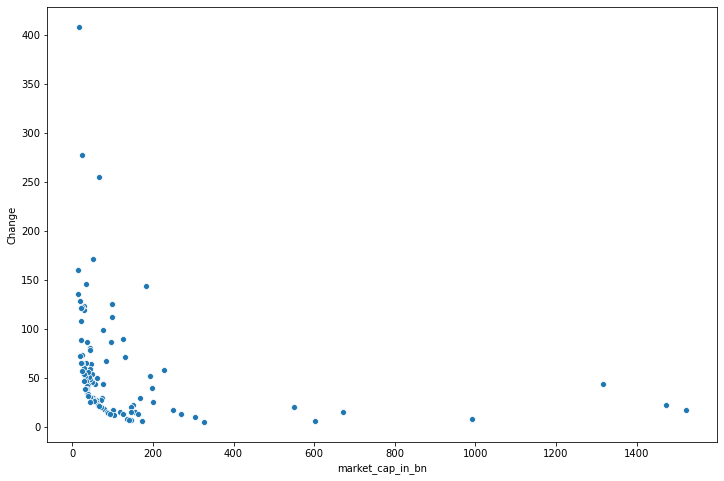

In [22]:
plt.figure(figsize= [12, 8])
sb.scatterplot(data = df, x = 'market_cap_in_bn', y = 'Change');

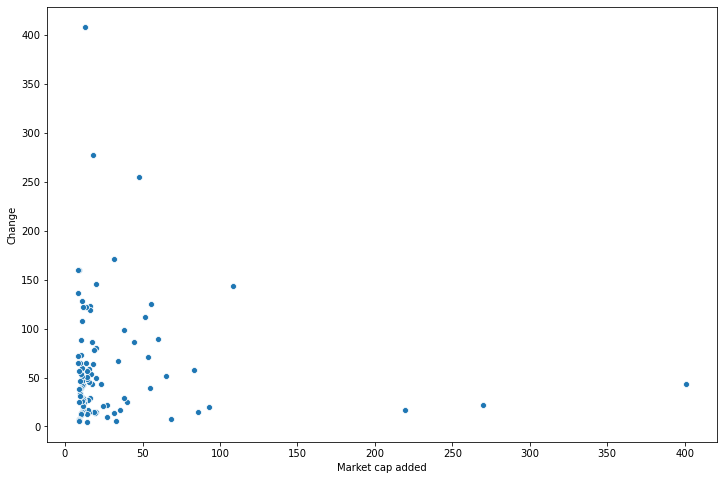

In [23]:
plt.figure(figsize= [12, 8])
sb.scatterplot(data = df, y = 'Change', x = 'Market cap added');

# (1) Which companies has the biggest market capital?

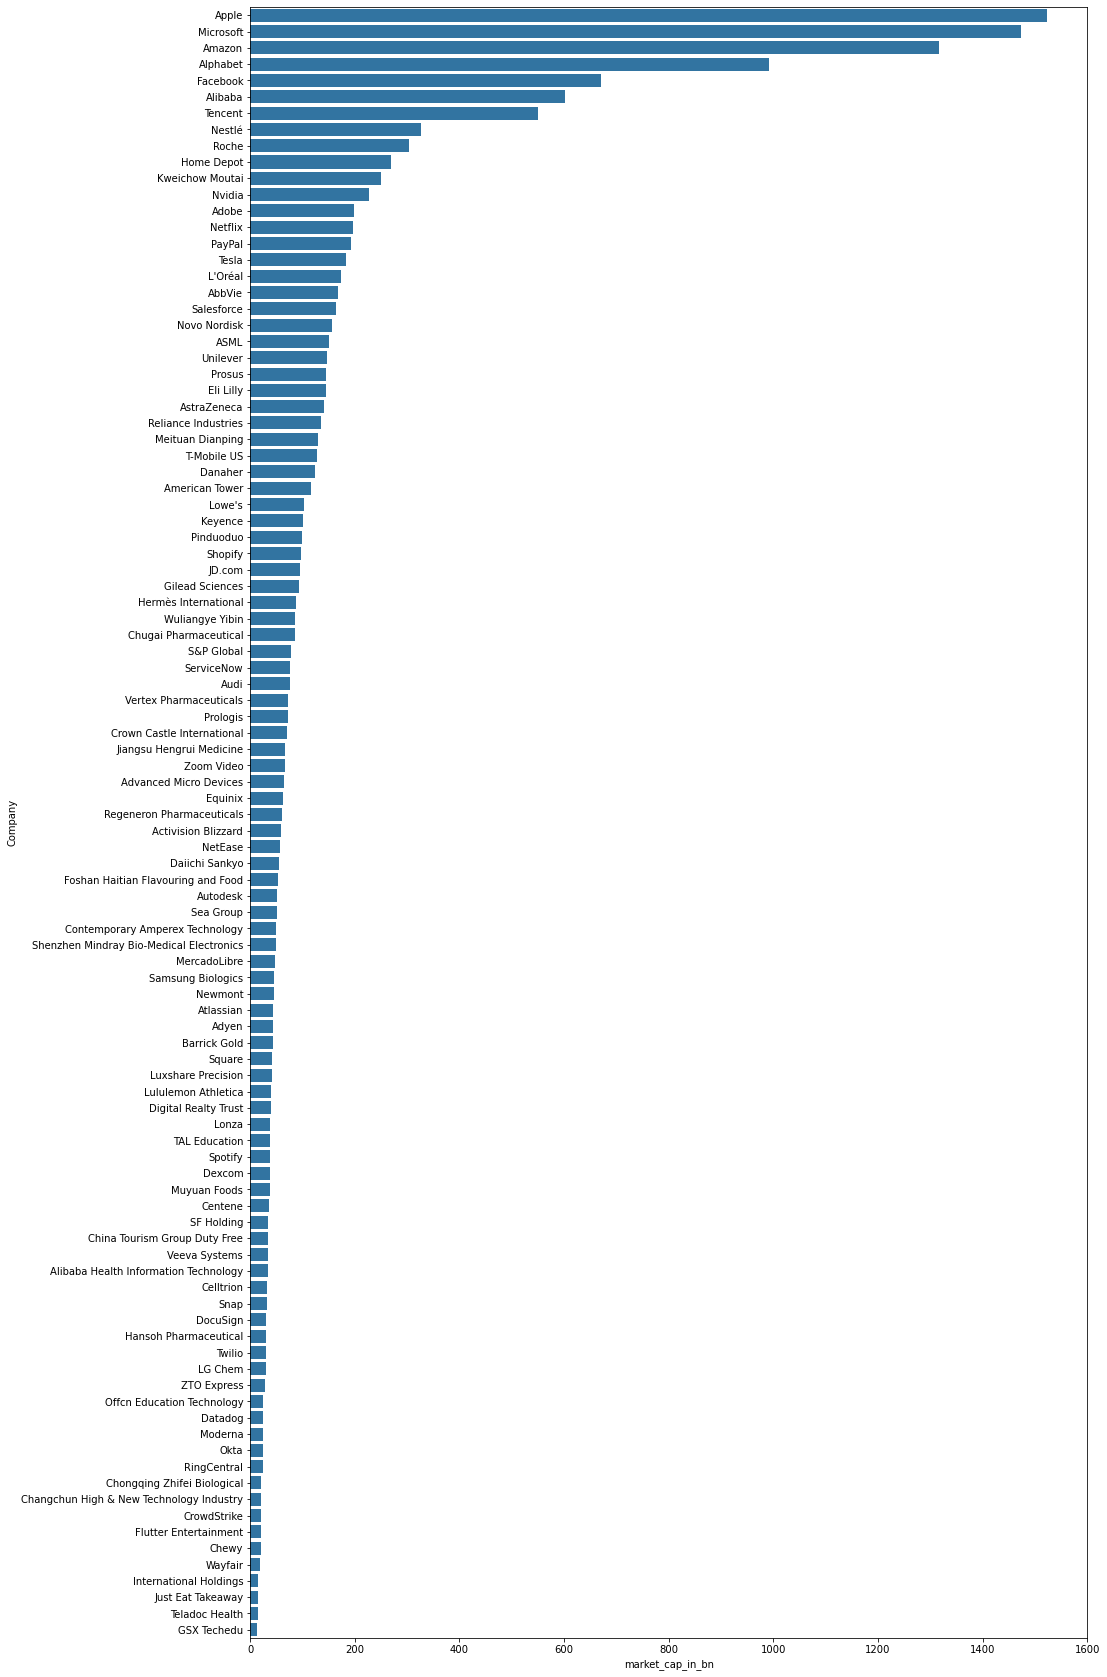

In [19]:
plt.figure(figsize= [15, 30])
sb.barplot(data = df, x = 'market_cap_in_bn', y = 'Company', color = base_color,
           order= df.sort_values('market_cap_in_bn', ascending = False).Company);

#  (2) Which companies has the biggest added market capital?

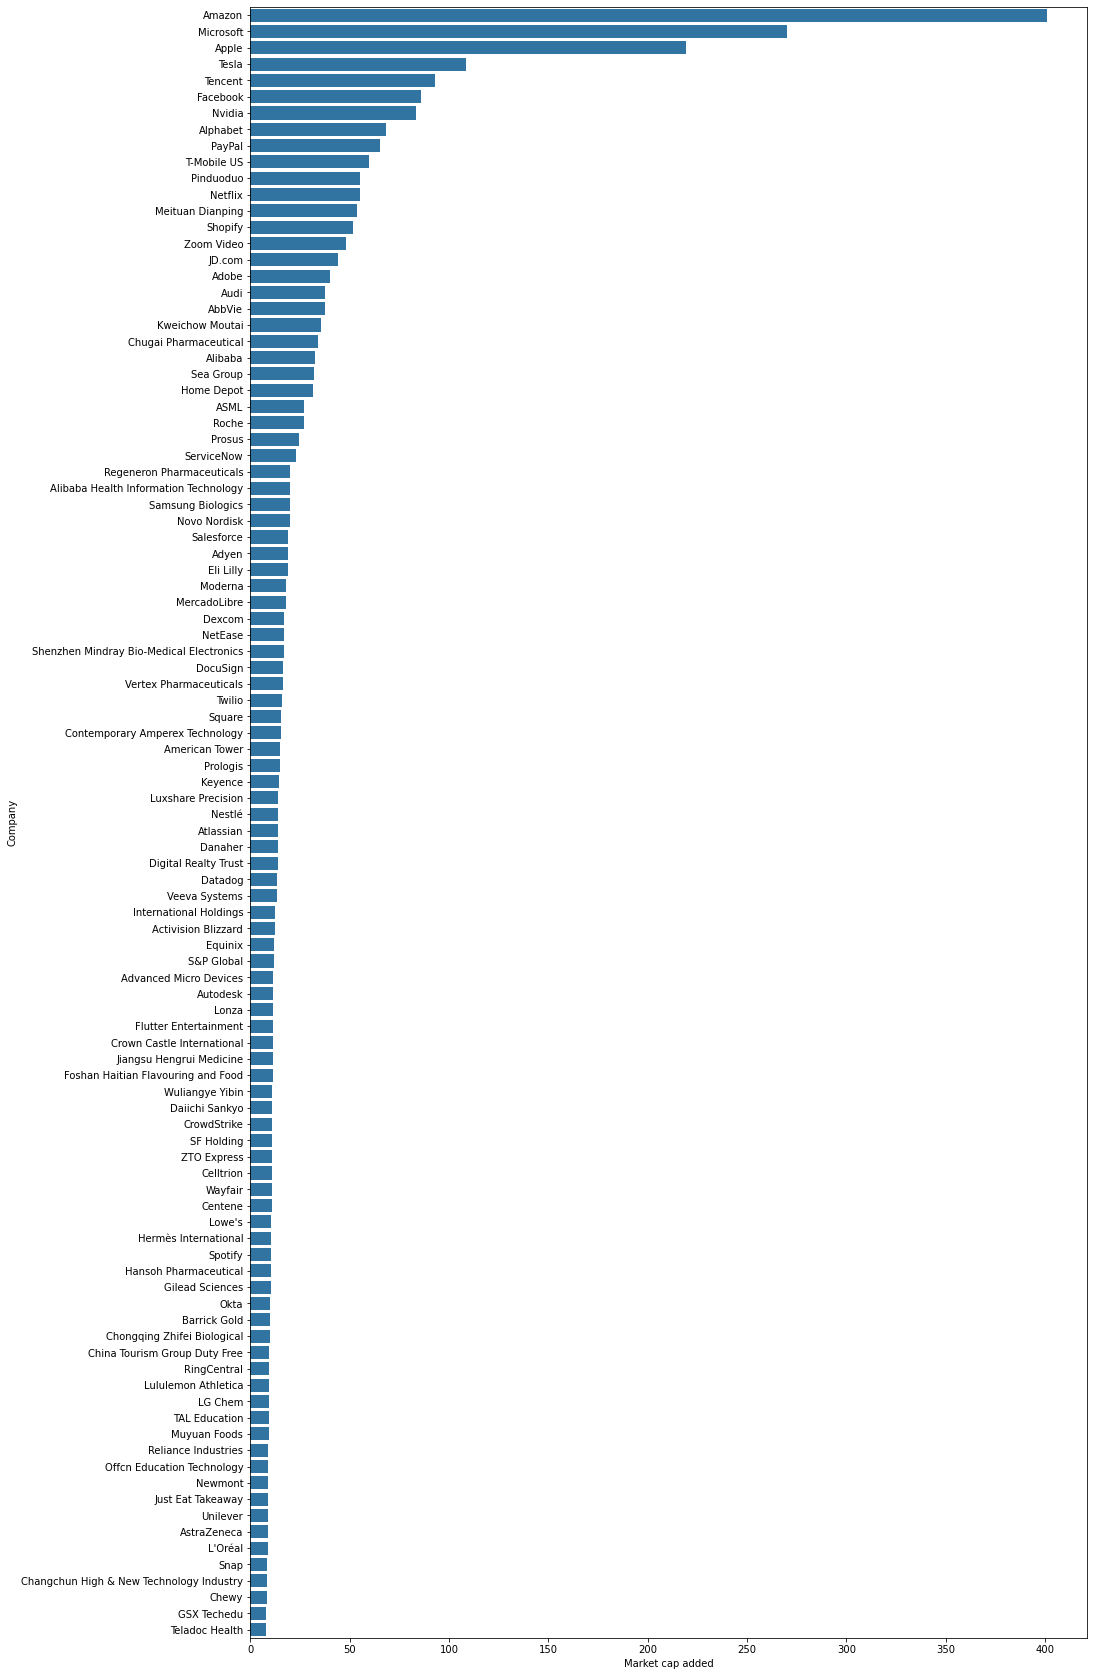

In [20]:
plt.figure(figsize= [15, 30])
sb.barplot(data = df, x = 'Market cap added', y = 'Company', color = base_color,
           order= df.sort_values('Market cap added', ascending = False).Company);

#  (3) Which companies has the biggest change in market capital?

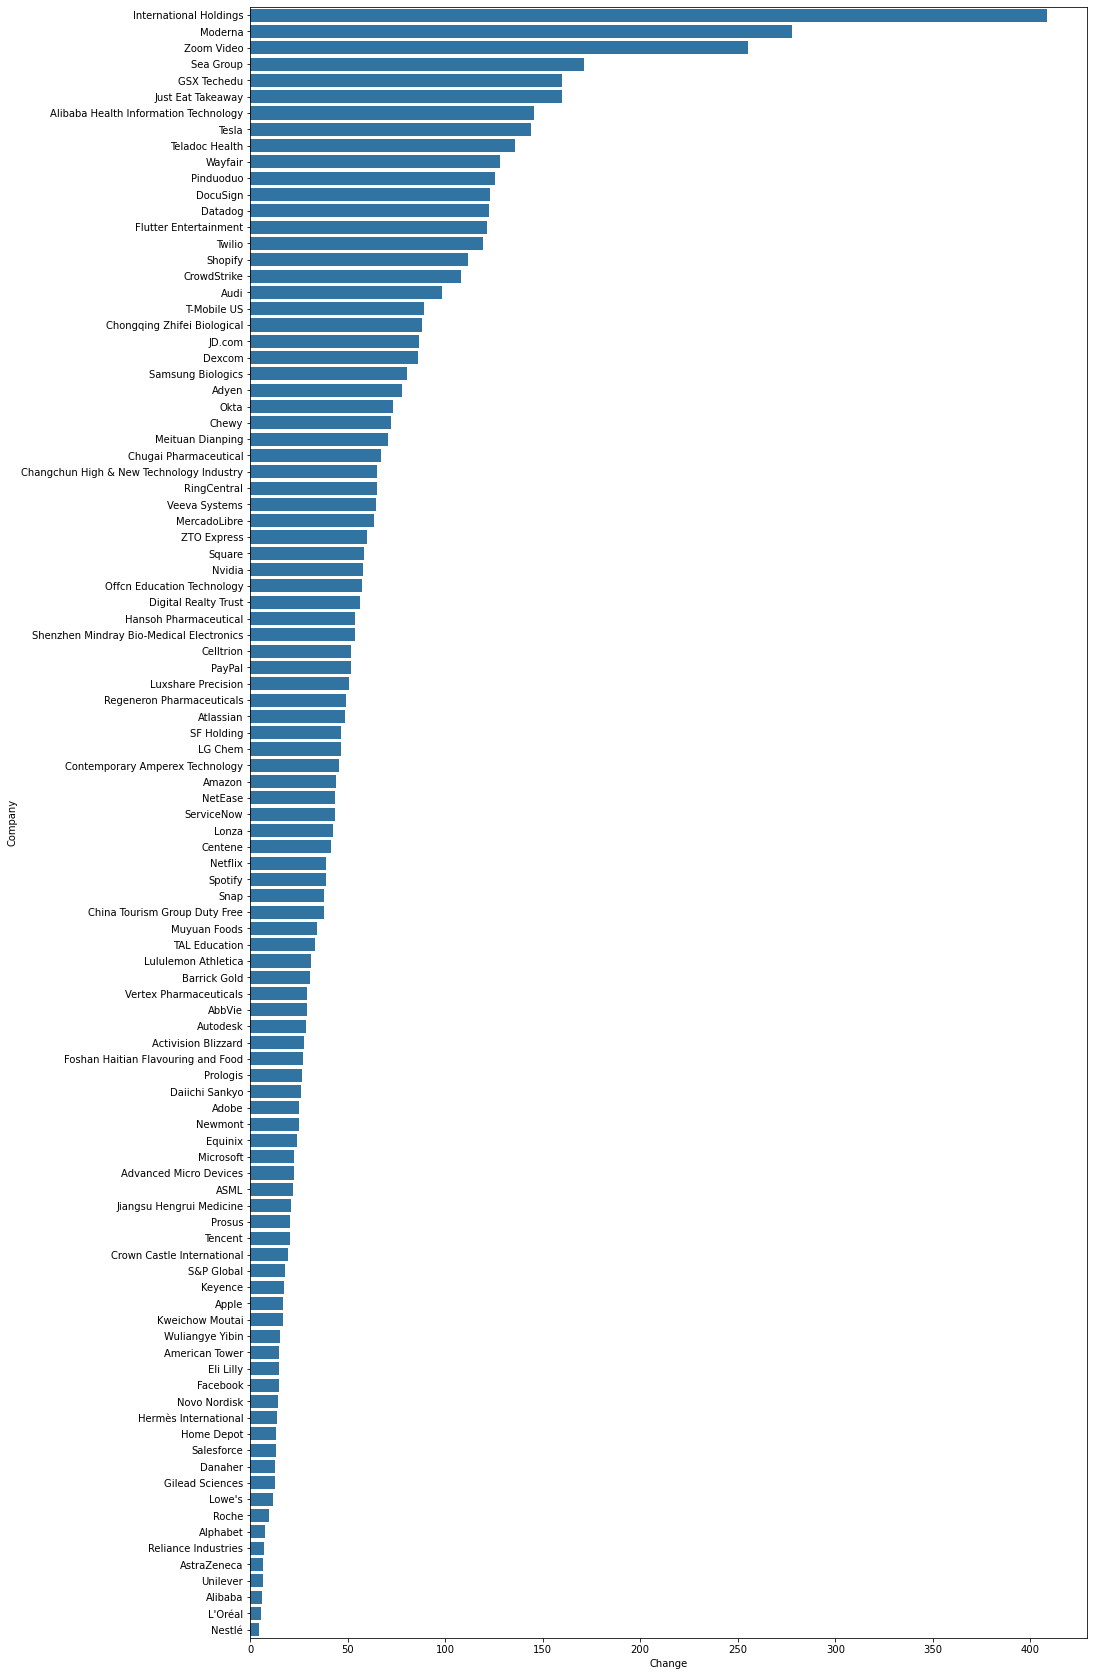

In [21]:
plt.figure(figsize= [15, 30])
sb.barplot(data = df, x = 'Change', y = 'Company', color = base_color,
           order= df.sort_values('Change', ascending = False).Company);

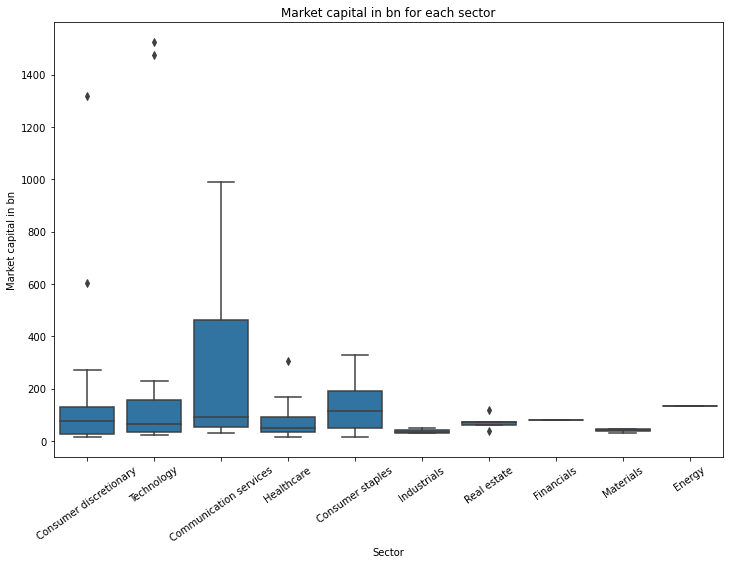

In [32]:
plt.figure(figsize = [12, 8])
sb.boxplot(data = df, x = 'Sector', y = 'market_cap_in_bn', color = base_color)
plt.xlabel('Sector')
plt.ylabel('Market capital in bn')
plt.title('Market capital in bn for each sector')
plt.xticks(rotation = 35);

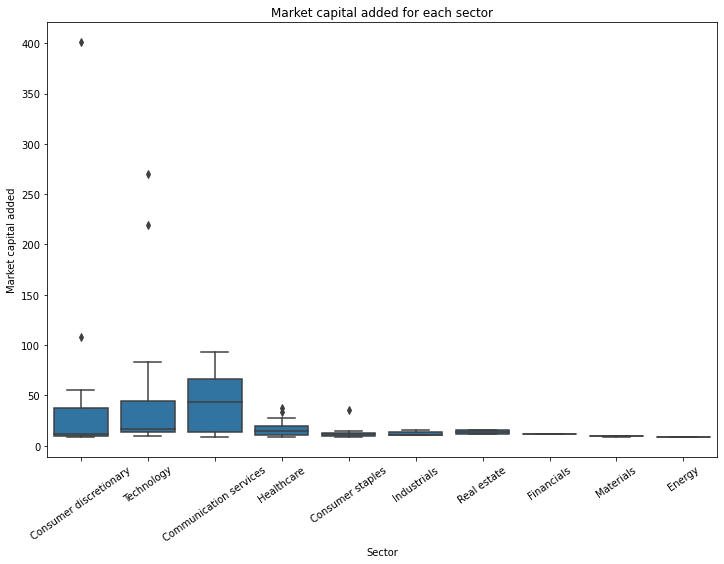

In [34]:
plt.figure(figsize = [12, 8])
sb.boxplot(data = df, x = 'Sector', y = 'Market cap added', color = base_color)
plt.xlabel('Sector')
plt.ylabel('Market capital added')
plt.title('Market capital added for each sector')
plt.xticks(rotation = 35);

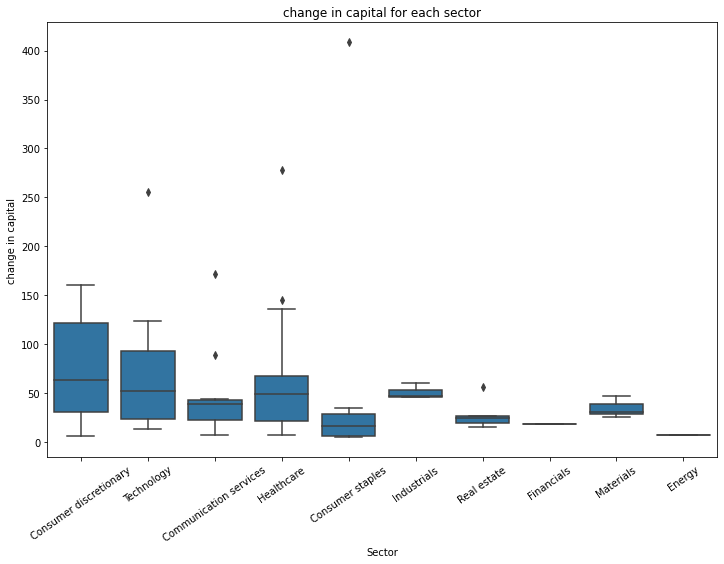

In [33]:
plt.figure(figsize = [12, 8])
sb.boxplot(data = df, x = 'Sector', y = 'Change', color = base_color)
plt.xlabel('Sector')
plt.ylabel('change in capital')
plt.title('change in capital for each sector')
plt.xticks(rotation = 35);

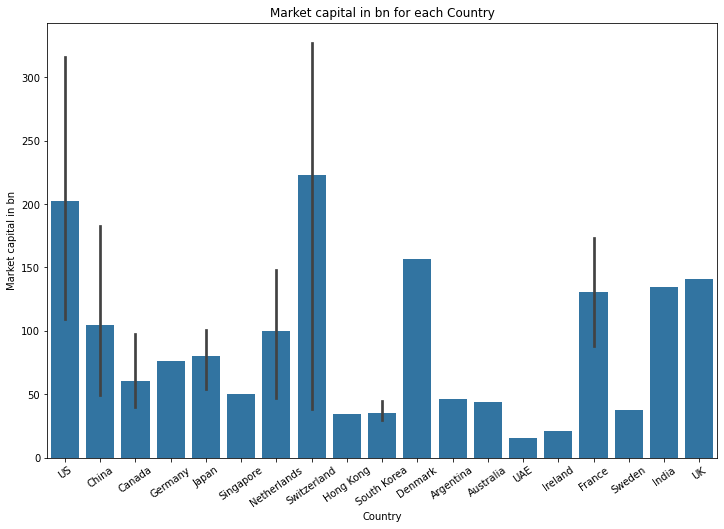

In [37]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Country', y = 'market_cap_in_bn', color = base_color)
plt.xlabel('Country')
plt.ylabel('Market capital in bn')
plt.title('Market capital in bn for each Country')
plt.xticks(rotation = 35);

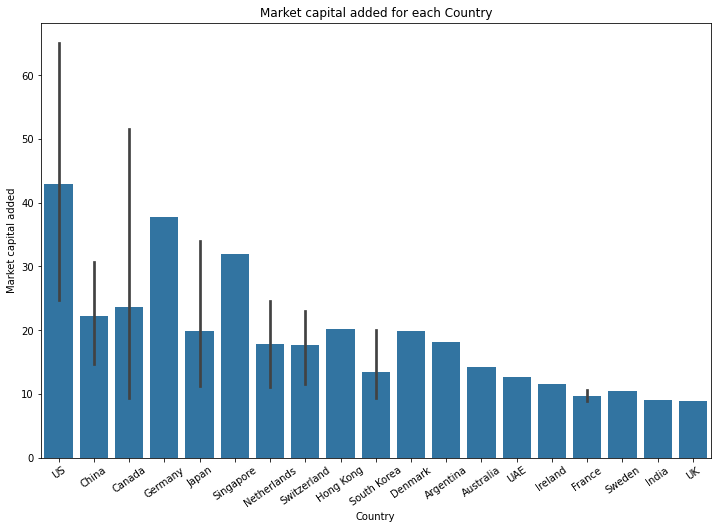

In [39]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Country', y = 'Market cap added', color = base_color)
plt.xlabel('Country')
plt.ylabel('Market capital added')
plt.title('Market capital added for each Country')
plt.xticks(rotation = 35);

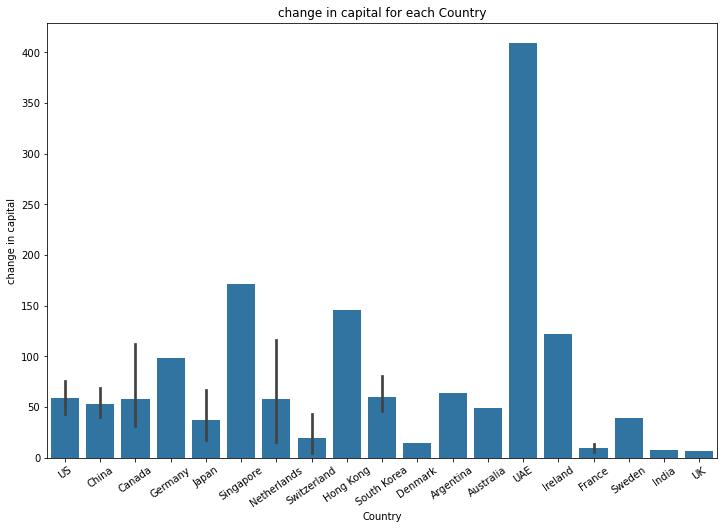

In [41]:
plt.figure(figsize = [12, 8])
sb.barplot(data = df, x = 'Country', y = 'Change', color = base_color)
plt.xlabel('Country')
plt.ylabel('change in capital')
plt.title('change in capital for each Country')
plt.xticks(rotation = 35);

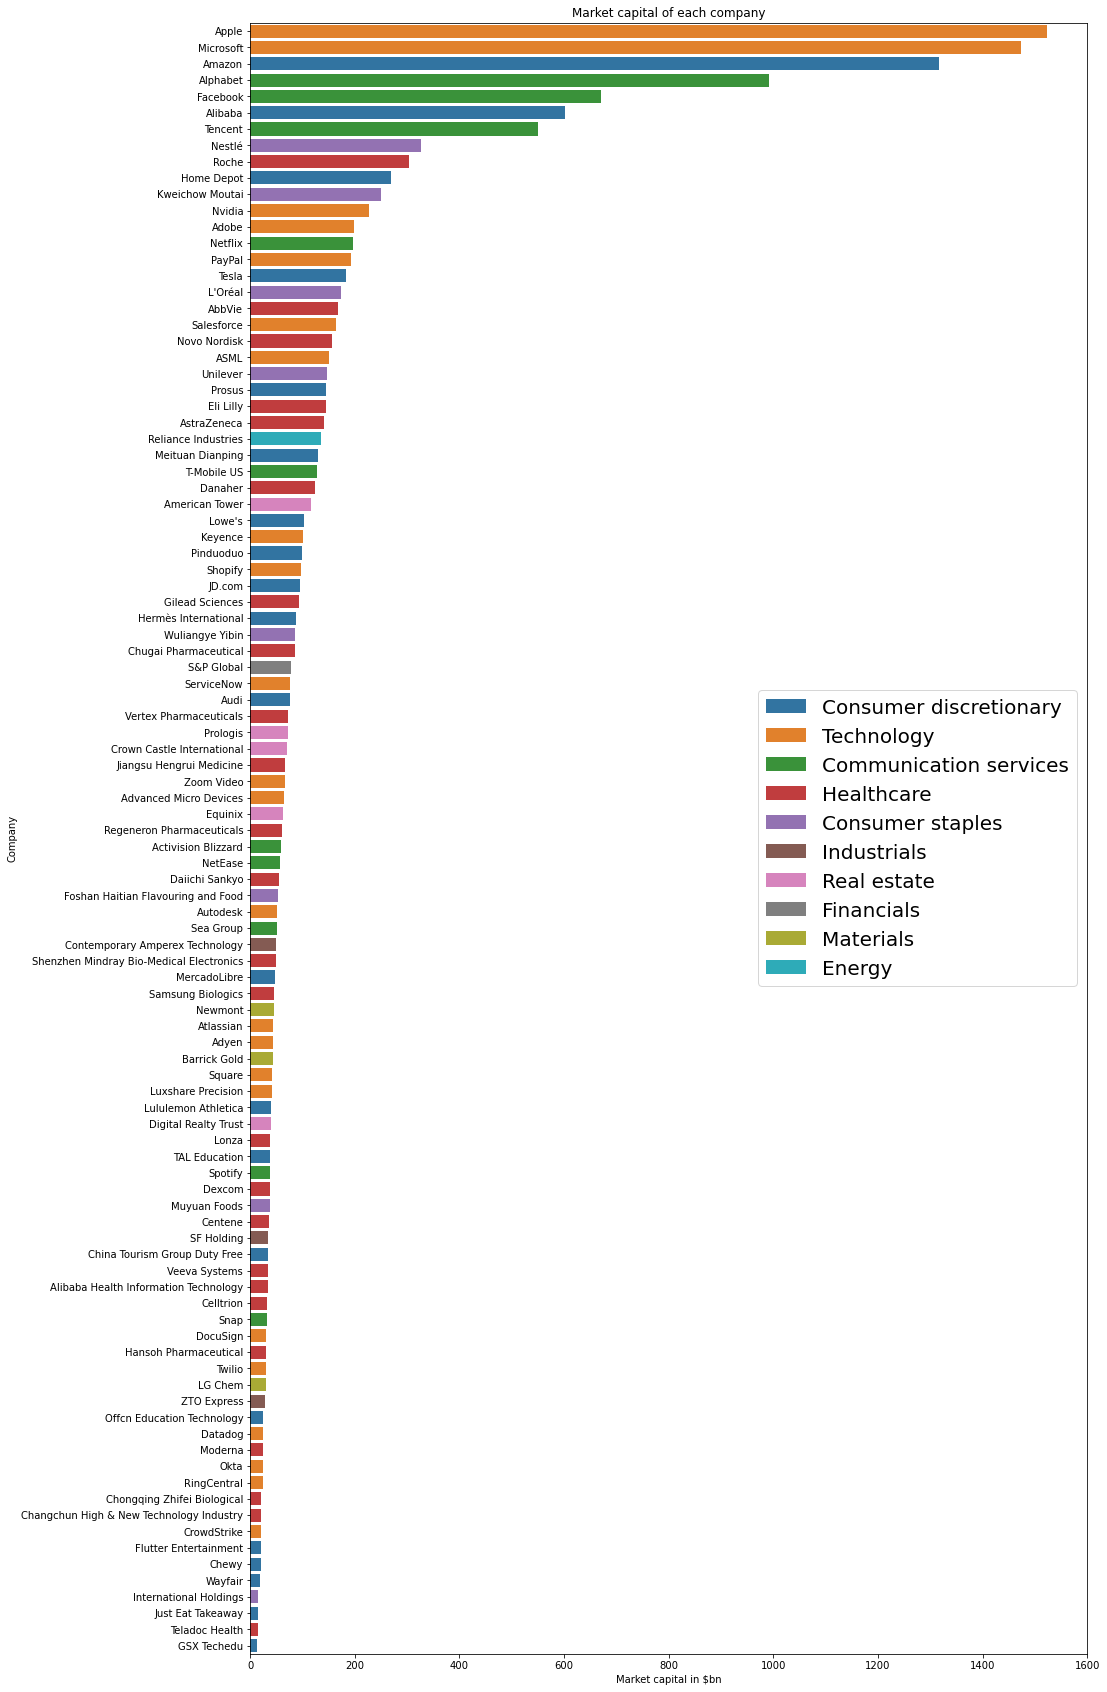

In [22]:
plt.figure(figsize= [15, 30])
sb.barplot(data = df, x = 'market_cap_in_bn', y = 'Company', order= df.sort_values('market_cap_in_bn',
                       ascending = False).Company, hue = 'Sector', dodge= False)
plt.legend(prop = {'size': 20})
plt.title('Market capital of each company')
plt.xlabel('Market capital in $bn')
plt.ylabel('Company');

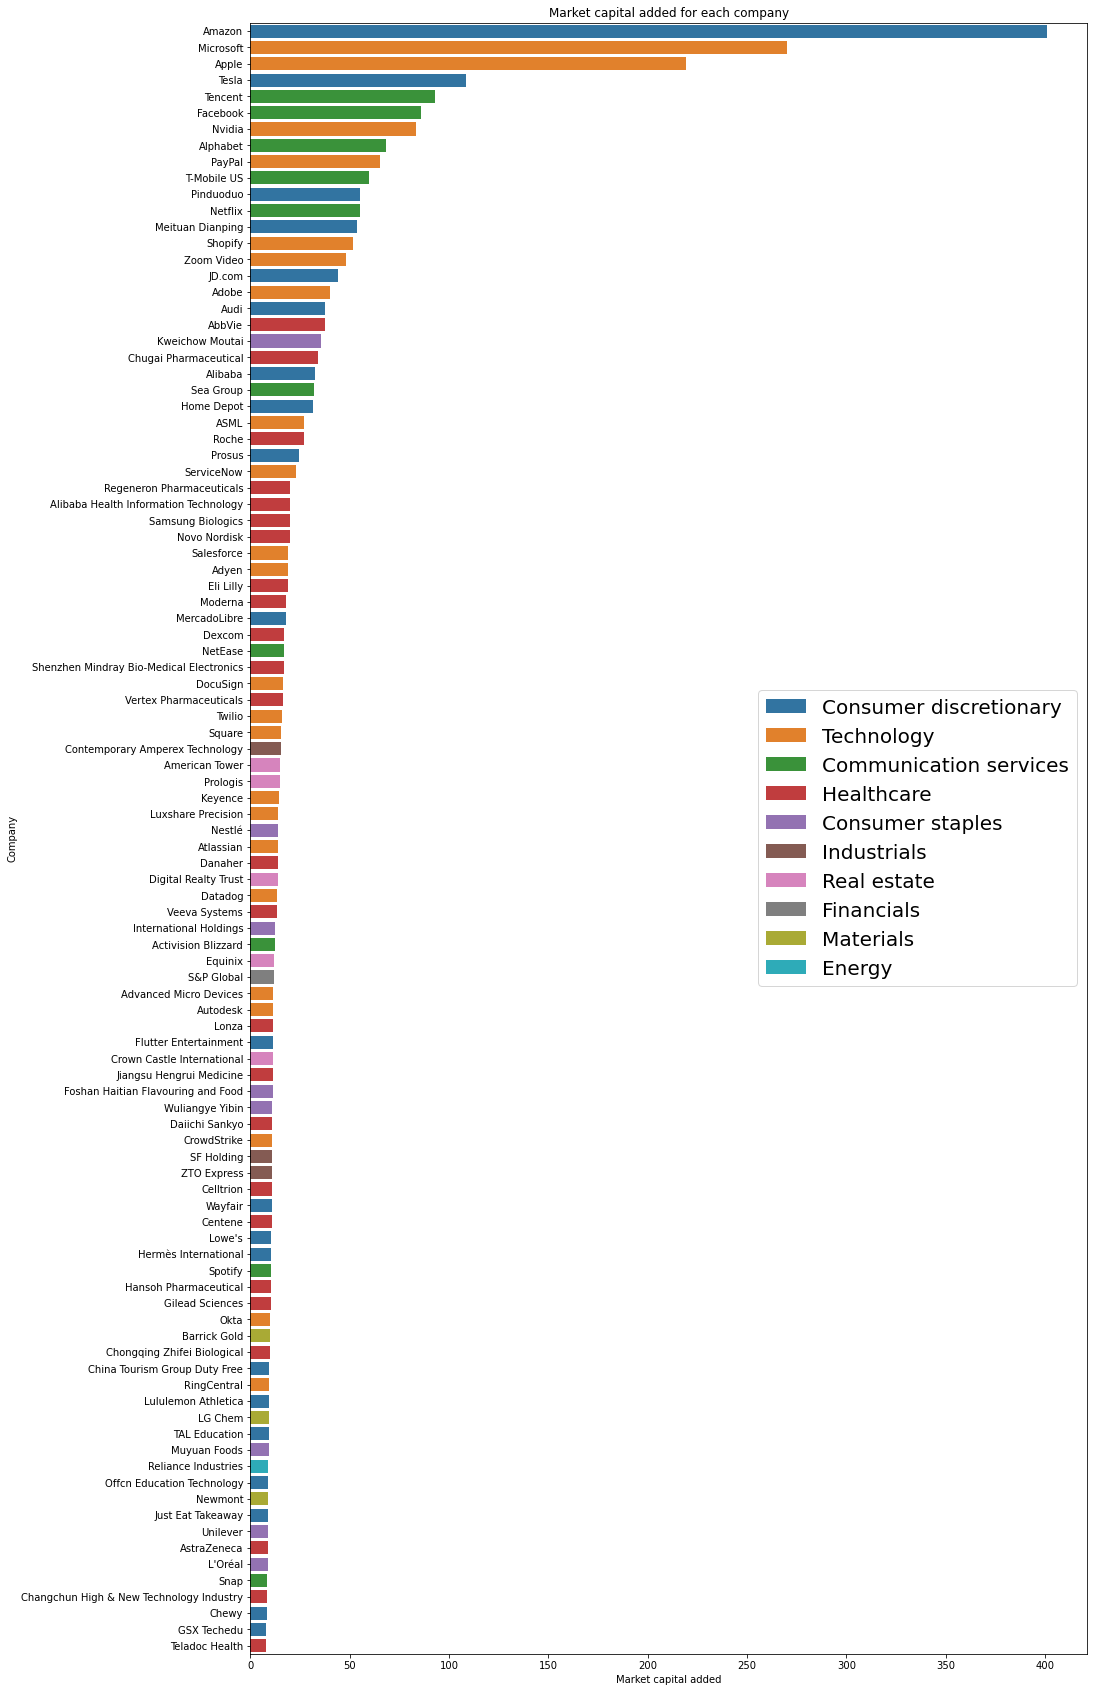

In [23]:
plt.figure(figsize= [15, 30])
sb.barplot(data = df, x = 'Market cap added', y = 'Company', order= df.sort_values('Market cap added',
                       ascending = False).Company, hue = 'Sector', dodge= False)
plt.legend(prop = {'size': 20})
plt.title('Market capital added for each company')
plt.xlabel('Market capital added')
plt.ylabel('Company');

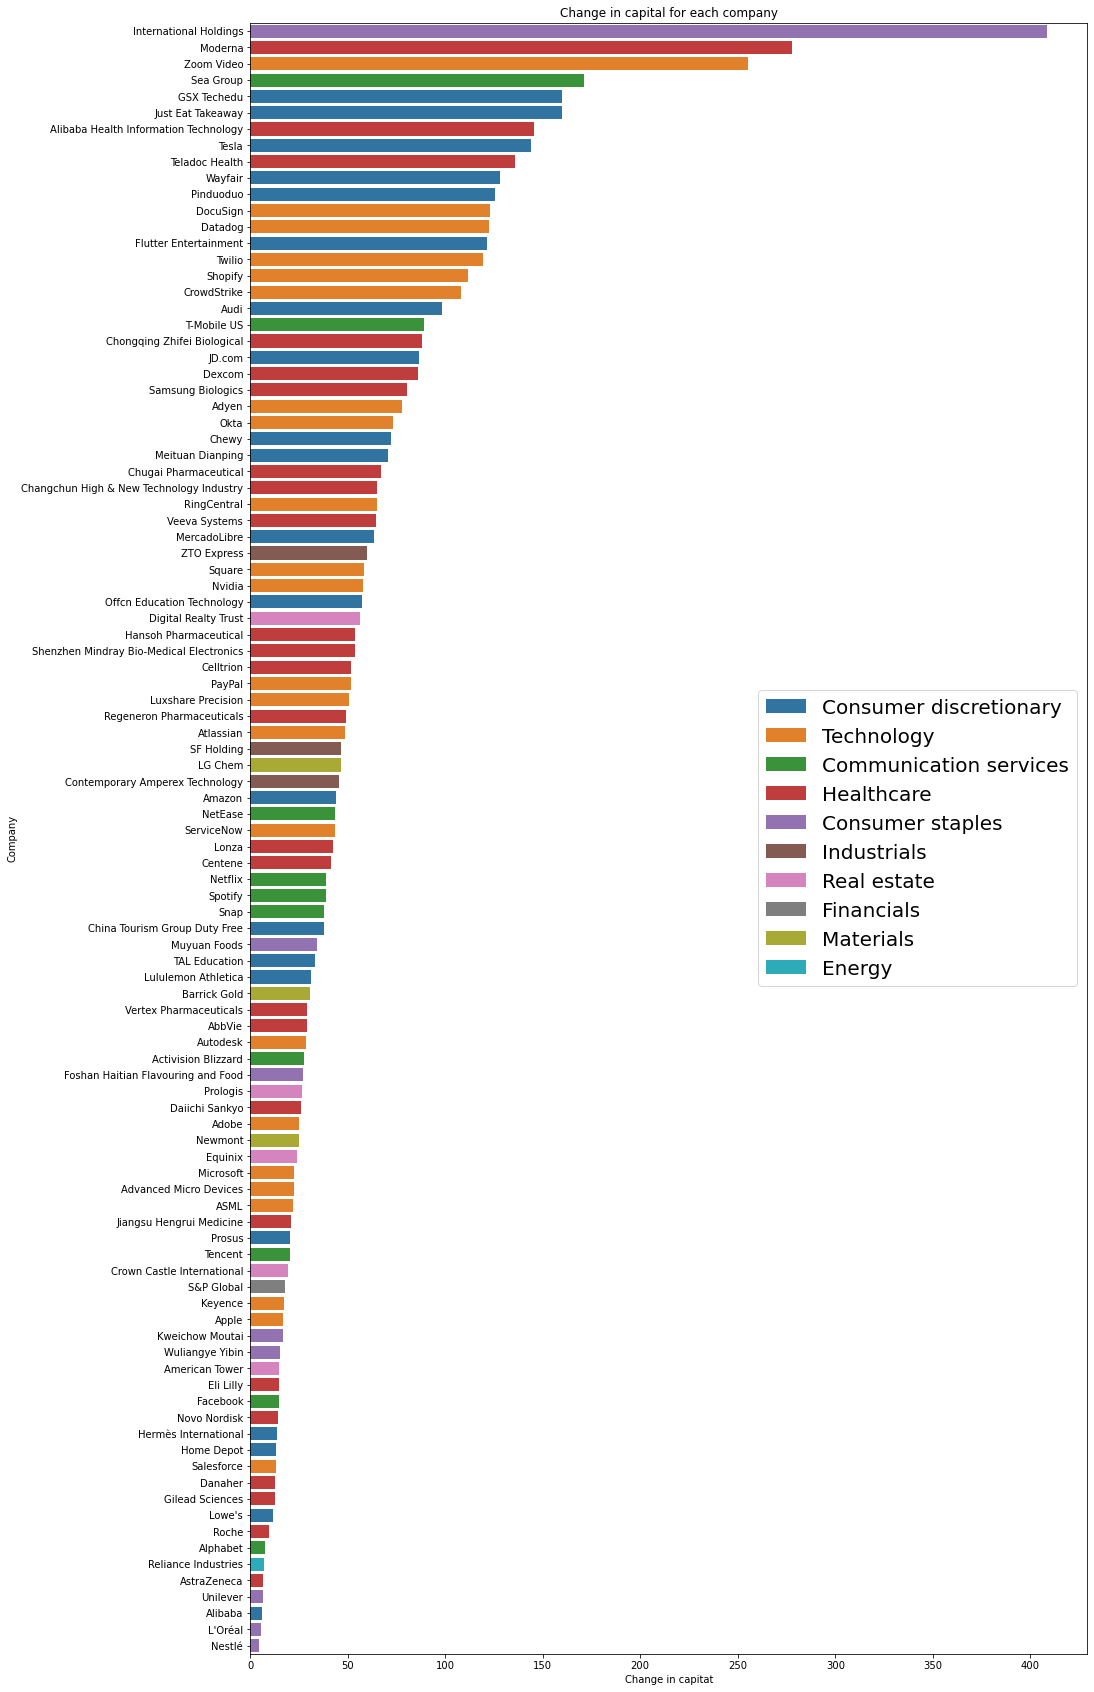

In [25]:
plt.figure(figsize= [15, 30])
sb.barplot(data = df, x = 'Change', y = 'Company', order= df.sort_values('Change',
                       ascending = False).Company, hue = 'Sector', dodge= False)
plt.legend(prop = {'size': 20})
plt.title('Change in capital for each company')
plt.xlabel('Change in capitat')
plt.ylabel('Company');